In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_keras import *
from keras.datasets import cifar10

In [2]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}
              
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
def process(X):
    X_norm = X.reshape(len(X), X[0].size).astype(float)
    X_norm -= np.mean(X)
    X_norm /= np.std(X).astype(float)
    #X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)).astype(float)
    return X_norm

In [4]:
Xtrain_n = process(Xtrain)
Xtest_n = process(Xtest)

testdata = [Xtest_n, ytest]

print(Xtrain_n.shape, ytrain.shape)

(50000, 3072) (50000, 1)


In [5]:
reg1 = regularizers.L2(lambda_=0.01)
reg2 = regularizers.L2(lambda_=0.01)
reg3 = regularizers.L2(lambda_=0.01)

model = models2.Network()

model.add(layers2.Input(Xtrain_n.shape[1]))
model.add(layers2.Dense(3072, 100, activation=activations.sigmoid(), reg=reg1), scale=.01)
model.add(layers2.Dense(100, 10, activation=activations.sigmoid(),reg=reg2), scale=.01)
model.printLayers()

Layer 0: <class 'my_keras.layers2.Input'>, neurons: 3072
Layer 1: <class 'my_keras.layers2.Dense'>, neurons: 100
Layer 2: <class 'my_keras.layers2.Dense'>, neurons: 10


In [6]:
model.layers[1].forward(Xtrain_n[0:10])

array([[0.64987621, 0.47478916, 0.61493125, 0.39012236, 0.5576118 ,
        0.42205731, 0.50304076, 0.56011769, 0.57361812, 0.45519566,
        0.55956313, 0.43928686, 0.41630772, 0.62243779, 0.58616471,
        0.47459918, 0.499515  , 0.49574157, 0.51297235, 0.53967868,
        0.52132281, 0.40069219, 0.44199204, 0.57388915, 0.3611546 ,
        0.60365868, 0.47378353, 0.41799474, 0.4742932 , 0.53320877,
        0.58151368, 0.3925632 , 0.54663473, 0.45268344, 0.45723761,
        0.50306899, 0.52240709, 0.40614584, 0.53659118, 0.45947162,
        0.52874326, 0.34307435, 0.48382366, 0.57802371, 0.51397838,
        0.52487788, 0.50273016, 0.48376878, 0.48022611, 0.52819496,
        0.4705915 , 0.47679101, 0.56692369, 0.52189343, 0.58334909,
        0.56096107, 0.52621434, 0.46939463, 0.465032  , 0.50108631,
        0.57905794, 0.49006969, 0.68229301, 0.54931473, 0.54471447,
        0.51425807, 0.41431838, 0.56456357, 0.56214548, 0.46036865,
        0.52232929, 0.4619264 , 0.60109674, 0.49

In [25]:
model.forward(Xtrain_n[0:1])
pred = model.layers[2].S[0:1]
los = losses.MSE_img()
los(pred, ytrain[0:1])
#los.gradient(pred, ytrain[0])


-1170.3779277987928

In [7]:
loss_hist = model.fit(Xtrain_n, ytrain, loss=losses.MSE_img(), opt=optimizers.SGD(alpha=.001), 
                      metric=metrics.acc_img, testdata=testdata, epochs=20, batch_size=100)

Epoch 0, Train loss: 0.0846
 Accuracy test: 10.43
Epoch 2, Train loss: 0.0867
 Accuracy test: 10.37
Epoch 4, Train loss: 0.0883
 Accuracy test: 10.35
Epoch 6, Train loss: 0.0895
 Accuracy test: 10.19
Epoch 8, Train loss: 0.0905
 Accuracy test: 10.10
Epoch 10, Train loss: 0.0913
 Accuracy test: 9.99
Epoch 12, Train loss: 0.0929
 Accuracy test: 10.11


KeyboardInterrupt: 

In [ ]:
model.layers[1].W

array([[ 2.63518956e-03,  4.43008610e-04,  2.32399639e-03, ...,
         8.85124166e-04,  2.60605594e-03,  5.73648587e-04],
       [-1.54371139e-04, -3.94958108e-04,  7.98150223e-04, ...,
         2.56055863e-04, -8.48537182e-04,  7.75700747e-05],
       [ 9.47214680e-04, -6.42951648e-05, -2.84484968e-04, ...,
        -1.17979976e-04,  1.35478683e-03,  9.87858088e-04],
       ...,
       [ 4.42185719e-04,  7.89967056e-04,  1.26746709e-03, ...,
         3.12508249e-04,  6.65931970e-04,  1.04949274e-03],
       [ 1.17649214e-03,  7.91376767e-04, -5.24682169e-04, ...,
        -1.15297209e-03,  3.20626098e-04, -1.05722395e-03],
       [-6.81906537e-04, -4.06267391e-04,  6.89493368e-04, ...,
         7.32166339e-05, -1.02744134e-03, -3.00618236e-04]])

10.712000000000002 10.780000000000001


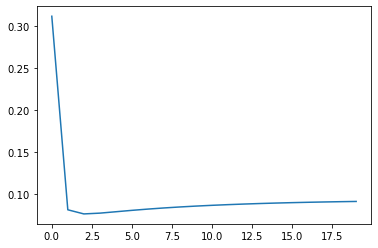

In [7]:
plt.plot(loss_hist)
print(100*metrics.acc_img(model.predict(Xtrain_n), ytrain), 
      100*metrics.acc_img(model.predict(Xtest_n), ytest))
